In [1]:
#import libs
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import movies data frame from model.py
from model import *
from viz_function import *
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Titre        250 non-null    object
 1   Année        250 non-null    object
 2   Score        250 non-null    object
 3   Réalisateur  250 non-null    object
 4   Votes        250 non-null    object
 5   Recette      216 non-null    object
 6   Genre        250 non-null    object
 7   Durée        250 non-null    object
dtypes: object(8)
memory usage: 17.6+ KB


In [3]:
movies.isna().sum(axis=0)

Titre           0
Année           0
Score           0
Réalisateur     0
Votes           0
Recette        34
Genre           0
Durée           0
dtype: int64

In [4]:
movies[movies['Recette'].isna()].sort_values('Année')

,Titre,Année,Score,Réalisateur,Votes,Recette,Genre,Durée
170,Jeux dangereux,1942,8.2,[Ernst Lubitsch],31392,None,"[Comedy, Romance, War]",99
30,La vie est belle,1946,8.6,[Frank Capra],411875,None,"[Drama, Family, Fantasy]",130
78,Boulevard du Crépuscule,1950,8.4,[Billy Wilder],205043,None,"[Drama, Film-Noir]",110
242,Le salaire de la peur,1953,8.1,[Henri-Georges Clouzot],55791,None,"[Adventure, Drama, Thriller]",156
166,Voyage à Tokyo,1953,8.2,[Yasujirô Ozu],54834,None,[Drama],136
164,Le septième sceau,1957,8.2,[Ingmar Bergman],168716,None,"[Drama, Fantasy, History]",96
76,Les sentiers de la gloire,1957,8.4,[Stanley Kubrick],181663,None,"[Drama, War]",88
163,Les fraises sauvages,1957,8.2,[Ingmar Bergman],98573,None,"[Drama, Romance]",91
237,Les quatre cents coups,1959,8.1,[François Truffaut],107750,None,"[Crime, Drama]",99
161,Jugement à Nuremberg,1961,8.2,[Stanley Kramer],70992,None,"[Drama, War]",179


In [5]:
features = movies.columns
numerical_features = ['Année', 'Score', 'Votes', 'Recette','Durée']
categorical_features = ['Titre', 'Réalisateur', 'Genre']
print(features)


Index(['Titre', 'Année', 'Score', 'Réalisateur', 'Votes', 'Recette', 'Genre',
       'Durée'],
      dtype='object')


In [6]:
#change types of numerical columns
for f in numerical_features:
    movies[f] = movies[f].astype('float')
movies['Année'] = movies['Année'].astype('int')

In [7]:
df_sort_by_recette = movies.sort_values('Recette', ascending=False)
df_sort_by_recette


,Titre,Année,Score,Réalisateur,Votes,Recette,Genre,Durée
56,Avengers: Endgame,2019,8.4,"[Anthony Russo, Joe Russo]",868076.0,858373000.0,"[Action, Adventure, Drama]",181.0
57,Avengers: Infinity War,2018,8.4,"[Anthony Russo, Joe Russo]",873254.0,678815482.0,"[Action, Adventure, Sci-Fi]",149.0
2,The Dark Knight : Le Chevalier noir,2008,9.0,[Christopher Nolan],2350253.0,534858444.0,"[Action, Crime, Drama]",152.0
60,The Dark Knight Rises,2012,8.4,[Christopher Nolan],1542103.0,448139099.0,"[Action, Adventure]",164.0
41,The Lion King,1994,8.5,"[Roger Allers, Rob Minkoff]",959517.0,422783777.0,"[Animation, Adventure, Drama]",88.0
...,...,...,...,...,...,...,...,...
230,Network - Main basse sur la TV,1976,8.1,[Sidney Lumet],147250.0,NaN,[Drama],121.0
231,Barry Lyndon,1975,8.1,[Stanley Kubrick],153097.0,NaN,"[Adventure, Drama, History]",185.0
234,Persona,1966,8.1,[Ingmar Bergman],106201.0,NaN,"[Drama, Thriller]",85.0
237,Les quatre cents coups,1959,8.1,[François Truffaut],107750.0,NaN,"[Crime, Drama]",99.0


## Statistical analysis

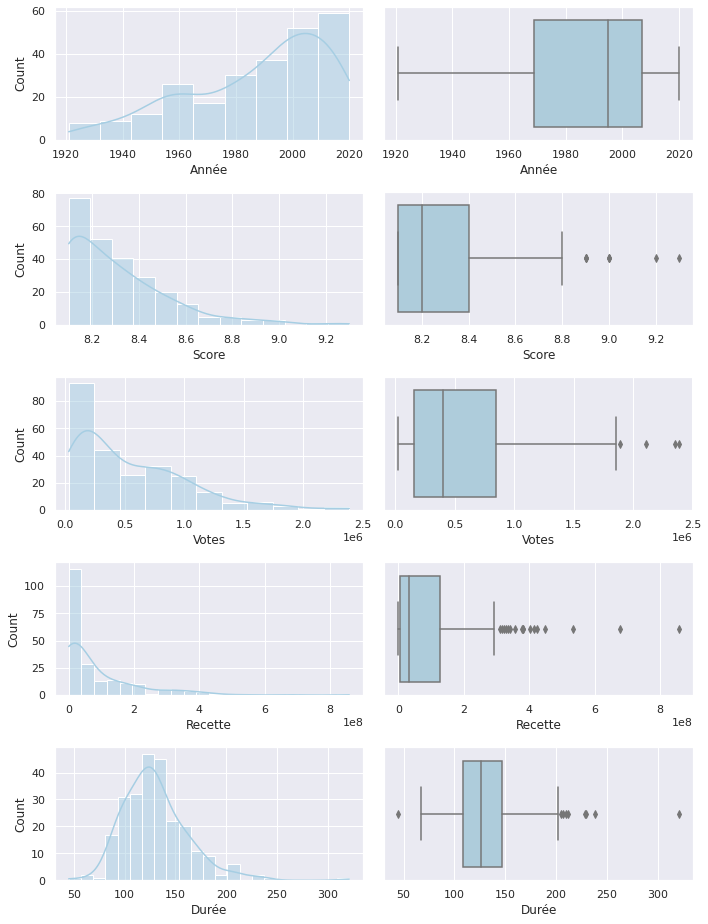

In [8]:
plot_numeric_features(movies, numerical_features)

In [9]:
print_stat(movies, numerical_features)


        ** Année ** 
        ------------------------
        min:    1921  
        max:    2020 
        mean:   1987.4 
        median: 1995.0 
        

        ** Score ** 
        ------------------------
        min:    8.1  
        max:    9.3 
        mean:   8.3 
        median: 8.2 
        

        ** Votes ** 
        ------------------------
        min:    28138.0  
        max:    2387181.0 
        mean:   549217.6 
        median: 399788.0 
        

        ** Recette ** 
        ------------------------
        min:    10177.0  
        max:    858373000.0 
        mean:   86848003.7 
        median: 31164078.0 
        

        ** Durée ** 
        ------------------------
        min:    45.0  
        max:    321.0 
        mean:   130.3 
        median: 126.5 
        


[Text(0.5, 0, 'Année'),
 Text(1.5, 0, 'Score'),
 Text(2.5, 0, 'Votes'),
 Text(3.5, 0, 'Recette'),
 Text(4.5, 0, 'Durée')]

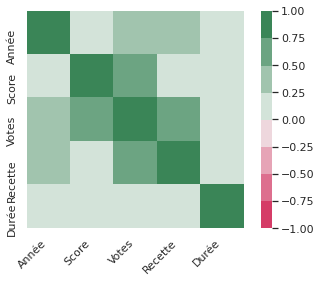

In [10]:
corr = movies[numerical_features].corr()
ax = sns.heatmap(corr,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 cmap=sns.diverging_palette(1, 500, n=8),
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

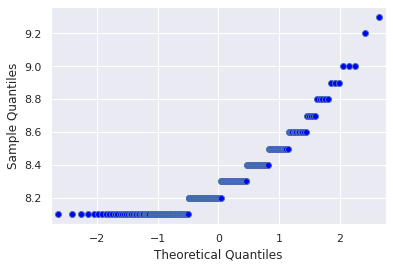

In [11]:
import statsmodels.api as sm

sm.qqplot(movies['Score'])
plt.show()


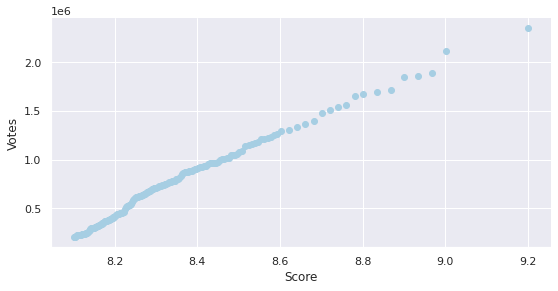

In [12]:
#!pip install seaborn_qqplot
from seaborn_qqplot import pplot
pplot(movies, x="Score", y="Votes", kind='qq',height=4, aspect=2)

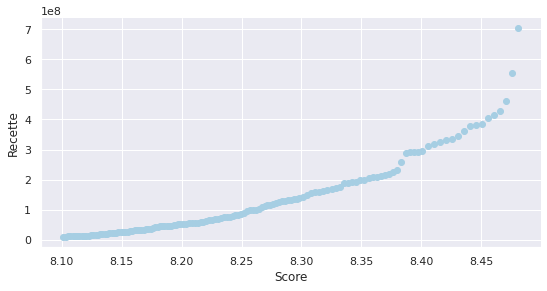

In [13]:
pplot(movies, x="Score", y="Recette", kind='qq',height=4, aspect=2)

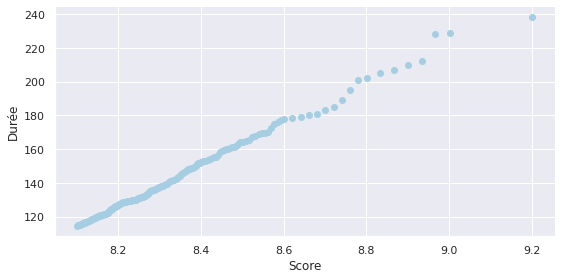

In [14]:
pplot(movies, x='Score', y="Durée", kind='qq',height=4, aspect=2) 

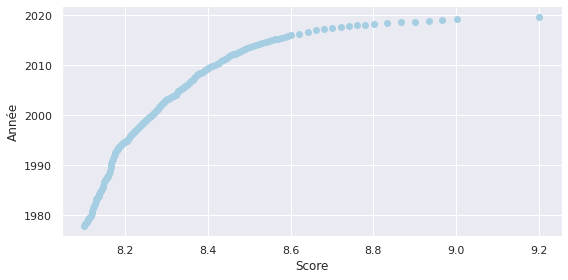

In [15]:
pplot(movies, x="Score", y="Année", kind='qq',height=4, aspect=2)

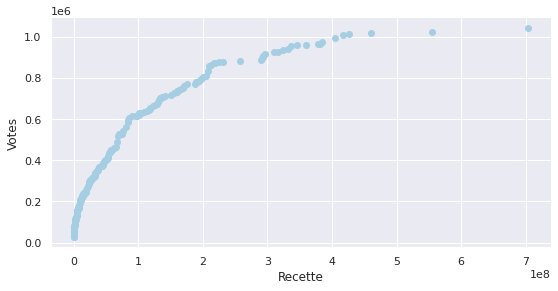

In [16]:
pplot(movies, x="Recette", y="Votes", kind='qq',height=4, aspect=2)

## Questions

### Score & recette correlation

<AxesSubplot:xlabel='Score', ylabel='Recette'>

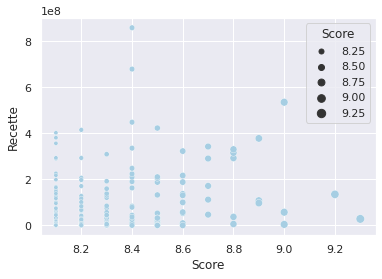

In [17]:
import seaborn as sns

sns.scatterplot(data=movies, x='Score', y='Recette', size='Score', legend=True)

   Score  Recette
0    8.1       66
1    8.2       41
2    8.3       36
3    8.4       26
4    8.5       18
5    8.6       11
6    8.7        5
7    8.8        5
8    8.9        3
9    9.0        3


Text(0.5, 1.0, 'Score and avg Recette by Score correlation')

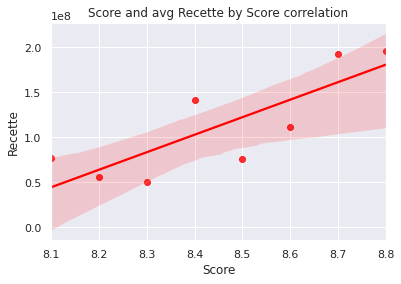

In [18]:
group_Recette_Score = movies[['Score', 'Recette']].groupby(by='Score',
                                                          sort=True,
                                                          as_index=False)
print(group_Recette_Score.Recette.count().head(10))

df = group_Recette_Score.Recette.mean()

sns.regplot(data=df[df.Score < 8.9], x='Score', y='Recette', color='red')
plt.title("Score and avg Recette by Score correlation")

<AxesSubplot:xlabel='Score', ylabel='Recette'>

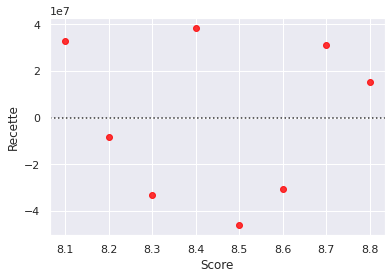

In [19]:
sns.residplot(data=df[df.Score < 8.9], x='Score', y='Recette', color='red')

<AxesSubplot:title={'center':'The number of movies by Score'}, xlabel='Score'>

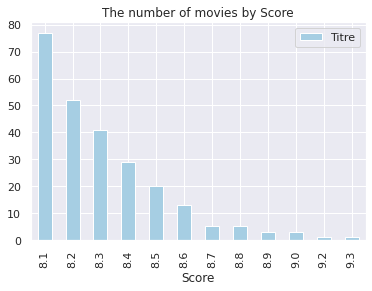

In [20]:
movies[['Titre', 'Score']].groupby('Score').count().plot(
    kind='bar', title='The number of movies by Score')

### Best scores movies

In [21]:
print_best_scores_movies(movies,['Score', 'Votes', 'Recette', 'Durée'])

                              MOVIES WITH BEST SCORES
**************************************************************************************
Les Évadés (1994) by Frank Darabont with  the highest Score = 9.3

Les Évadés (1994) by Frank Darabont with  the highest Votes = 2,387,181.0

Avengers: Endgame (2019) by Anthony Russo, Joe Russo with  the highest Recette = 858,373,000.0

Gangs of Wasseypur (2012) by Anurag Kashyap with  the highest Durée = 321.0



### Decades analysis

In [37]:
#number of bins by decade
bin_min = movies.Année.min() // 10
bin_max = movies.Année.max() // 10 + 1
bins = [10 * i - 1 for i in range(bin_min, bin_max + 1)]
group_names = [int(b + 1) for b in bins]

movies['decade'] = pd.cut(movies['Année'],
                                bins,
                                labels=group_names[:-1],
                                include_lowest=True)

decade_Score = movies[['decade', 'Score',
                            'Recette']].groupby(by='decade',
                                                sort=True,
                                                as_index=False).mean()
print(decade_Score.head(20))
print("""
Correlation average Score by decade with time   = {}
Correlation average budget by decade with time = {}
""".format(decade_Score.Score.corr(decade_Score.decade),
           decade_Score.Recette.corr(decade_Score.decade)))

   decade     Score       Recette
0    1920  8.200000  2.361552e+06
1    1930  8.266667  3.547463e+07
2    1940  8.300000  2.346849e+06
3    1950  8.278261  1.433139e+07
4    1960  8.305556  1.729602e+07
5    1970  8.347368  7.864391e+07
6    1980  8.267857  8.021483e+07
7    1990  8.407692  1.018534e+08
8    2000  8.300000  1.024131e+08
9    2010  8.250000  1.424995e+08
10   2020  8.300000           NaN

Correlation average Score by decade with time   = 0.3699363424300124
Correlation average budget by decade with time = 0.9182114650071519



Text(0.5, 1.0, 'Decade - Recette correlation')

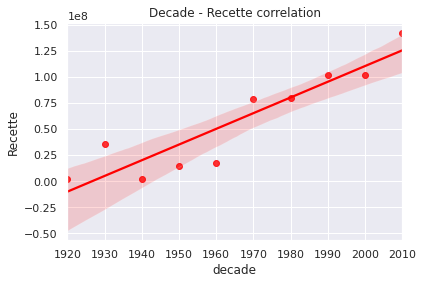

In [38]:
sns.regplot(data=decade_Score, x='decade', y='Recette', color='red')
plt.title('Decade - Recette correlation')

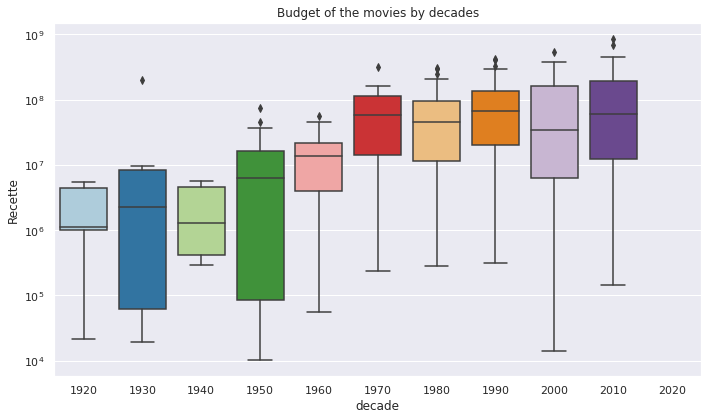

In [39]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data = movies, x="decade", y="Recette")
ax.set_yscale("log")
ax.set_title(f"Budget of the movies by decades")
plt.tight_layout()


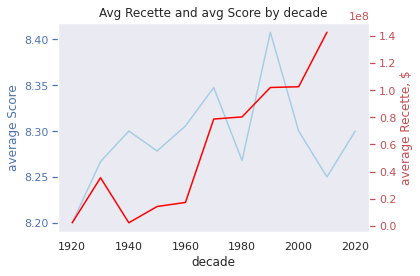

In [40]:
fig, ax1 = plt.subplots()

sns.lineplot(data = decade_Score, x = 'decade', y= 'Score', ax = ax1)
ax1.set_xlabel('decade')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('average Score', color='b')
ax1.tick_params('y', colors='b')
ax1.grid(b=None)

ax2 = ax1.twinx()

sns.lineplot(data = decade_Score, x = 'decade', y= 'Recette', ax = ax2, color = 'red')
ax2.set_ylabel('average Recette, $', color='r')
ax2.tick_params('y', colors='r')
ax2.grid(b=None)

plt.title('Avg Recette and avg Score by decade')
fig.tight_layout()
plt.show()


### Analyse de realisateurs

In [41]:
Réalisateur = create_transformed_df(movies, 'Réalisateur',
                                  ['Score', 'Recette', 'Durée'])
Réalisateur.head()

,Réalisateur,avg_movie_Score,avg_movie_Recette,avg_movie_Durée,number_of_movies
0,Anurag Kashyap,8.200,NaN,321.00,1
1,Victor Fleming,8.100,198676459.0,238.00,1
2,George Cukor,8.100,198676459.0,238.00,1
3,Sam Wood,8.100,198676459.0,238.00,1
4,Sergio Leone,8.475,7935754.0,171.75,4


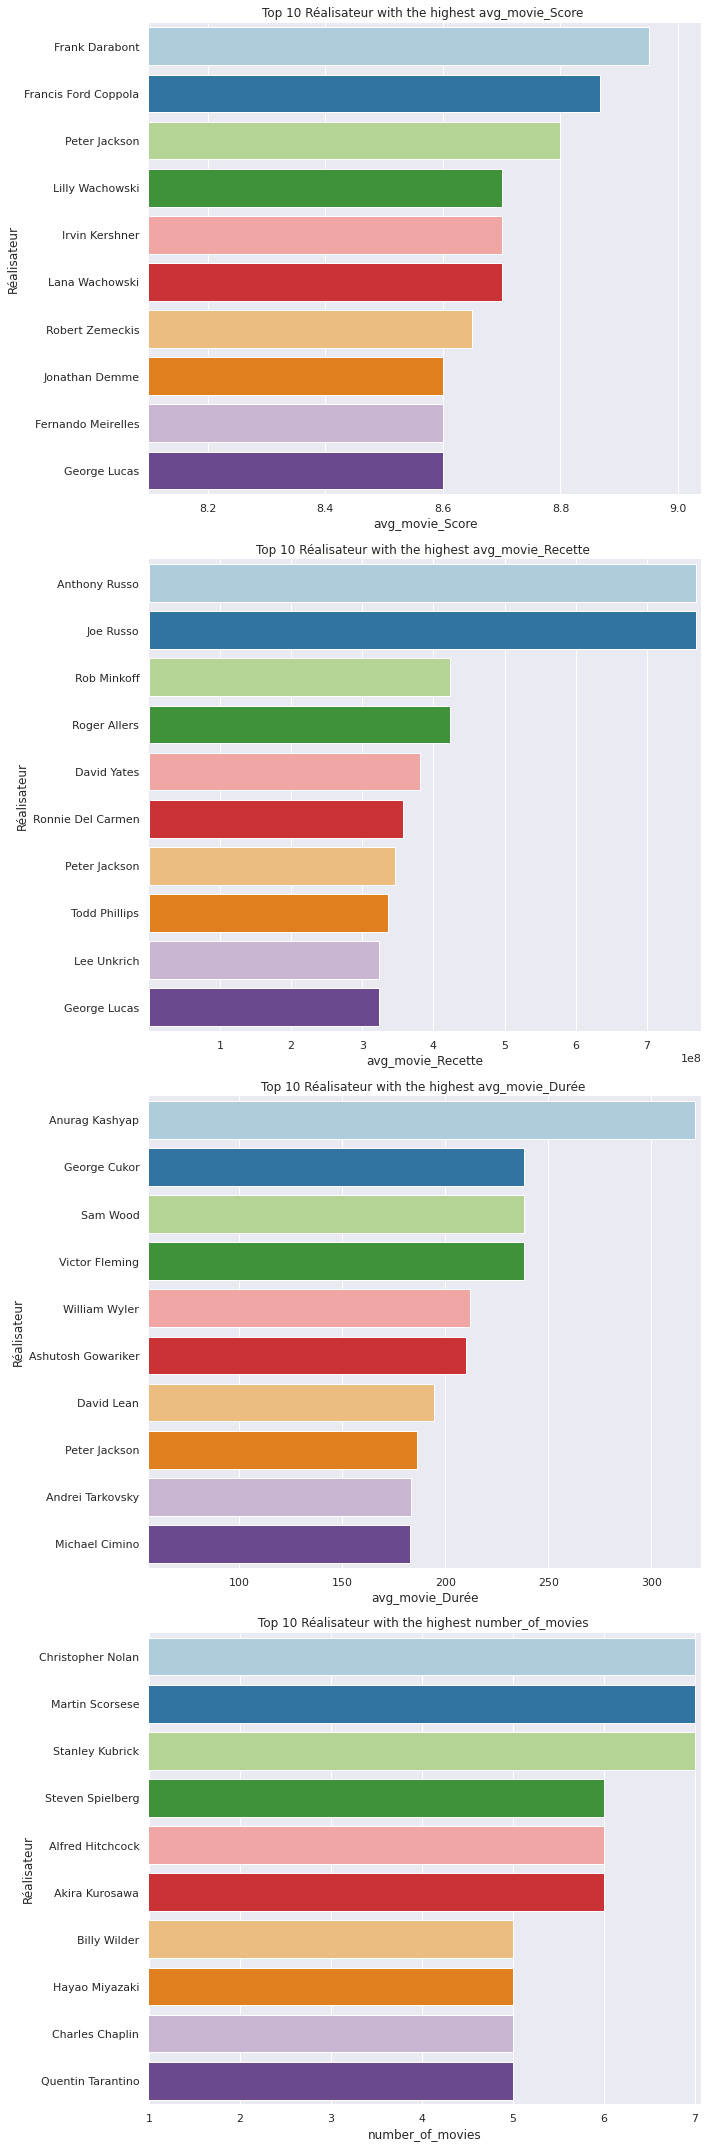

In [42]:
barplot_top_N(Réalisateur, 'Réalisateur', 10)

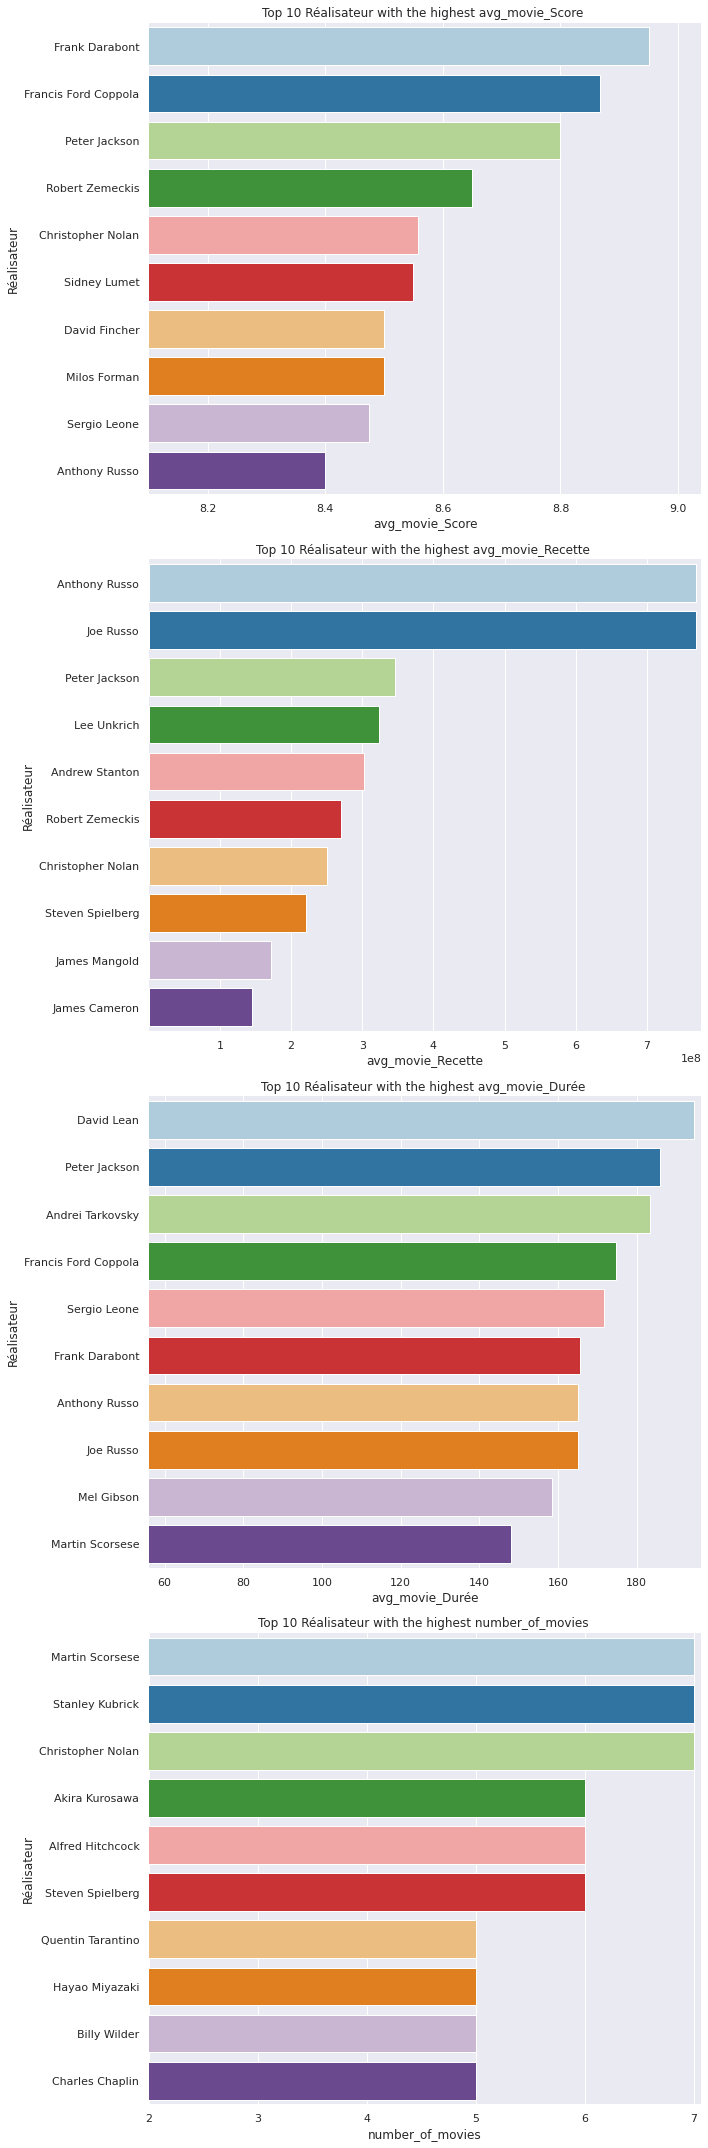

In [43]:
barplot_top_N(Réalisateur[Réalisateur.number_of_movies>1], 'Réalisateur', 10)

In [45]:
top_realisateur = [r for r in Réalisateur[Réalisateur.number_of_movies>2].Réalisateur]  
print(top_realisateur)
#movies[if movies.Réalisateur == i for i in top_realisateur]


['Sergio Leone', 'Akira Kurosawa', 'Francis Ford Coppola', 'Peter Jackson', 'Steven Spielberg', 'Stanley Kubrick', 'Martin Scorsese', 'Christopher Nolan', 'Quentin Tarantino', 'Ridley Scott', 'David Fincher', 'Alfred Hitchcock', 'Hayao Miyazaki', 'Clint Eastwood', 'Frank Capra', 'Billy Wilder', 'Charles Chaplin', 'Ethan Coen', 'Joel Coen', 'Lee Unkrich', 'Pete Docter', 'Ingmar Bergman']


In [46]:
movies[[len(set(i).intersection(set(top_realisateur)))>0 for i in movies.Réalisateur]]

,Titre,Année,Score,Réalisateur,Votes,Recette,Genre,Durée,decade
2,Il était une fois en Amérique,1984,8.4,[Sergio Leone],317566.0,5321508.0,"[Crime, Drama]",229.0,1980
6,Les 7 Samouraïs,1954,8.6,[Akira Kurosawa],320882.0,269061.0,"[Action, Adventure, Drama]",207.0,1950
8,"Le parrain, 2ème partie",1974,9.0,[Francis Ford Coppola],1150836.0,57300000.0,"[Crime, Drama]",202.0,1970
9,Le Seigneur des anneaux : Le Retour du roi,2003,8.9,[Peter Jackson],1669459.0,377845905.0,"[Action, Adventure, Drama]",201.0,2000
10,La liste de Schindler,1993,8.9,[Steven Spielberg],1234059.0,96898818.0,"[Biography, Drama, History]",195.0,1990
...,...,...,...,...,...,...,...,...,...
240,Les lumières de la ville,1931,8.5,[Charles Chaplin],170862.0,19181.0,"[Comedy, Drama, Romance]",87.0,1930
241,Les temps modernes,1936,8.5,[Charles Chaplin],222279.0,163245.0,"[Comedy, Drama, Family]",87.0,1930
243,Mon voisin Totoro,1988,8.2,[Hayao Miyazaki],299491.0,1105564.0,"[Animation, Family, Fantasy]",86.0,1980
244,Persona,1966,8.1,[Ingmar Bergman],106201.0,NaN,"[Drama, Thriller]",85.0,1960


### Analyse de Genres

In [47]:
Genre = create_transformed_df(movies, 'Genre',
                              ['Score', 'Durée'])
Genre.head()

,Genre,avg_movie_Score,avg_movie_Durée,number_of_movies
0,Action,8.371429,139.476190,42
1,Comedy,8.238636,112.340909,44
2,Crime,8.321053,136.070175,57
3,Drama,8.304865,134.437838,185
4,History,8.226667,164.066667,15


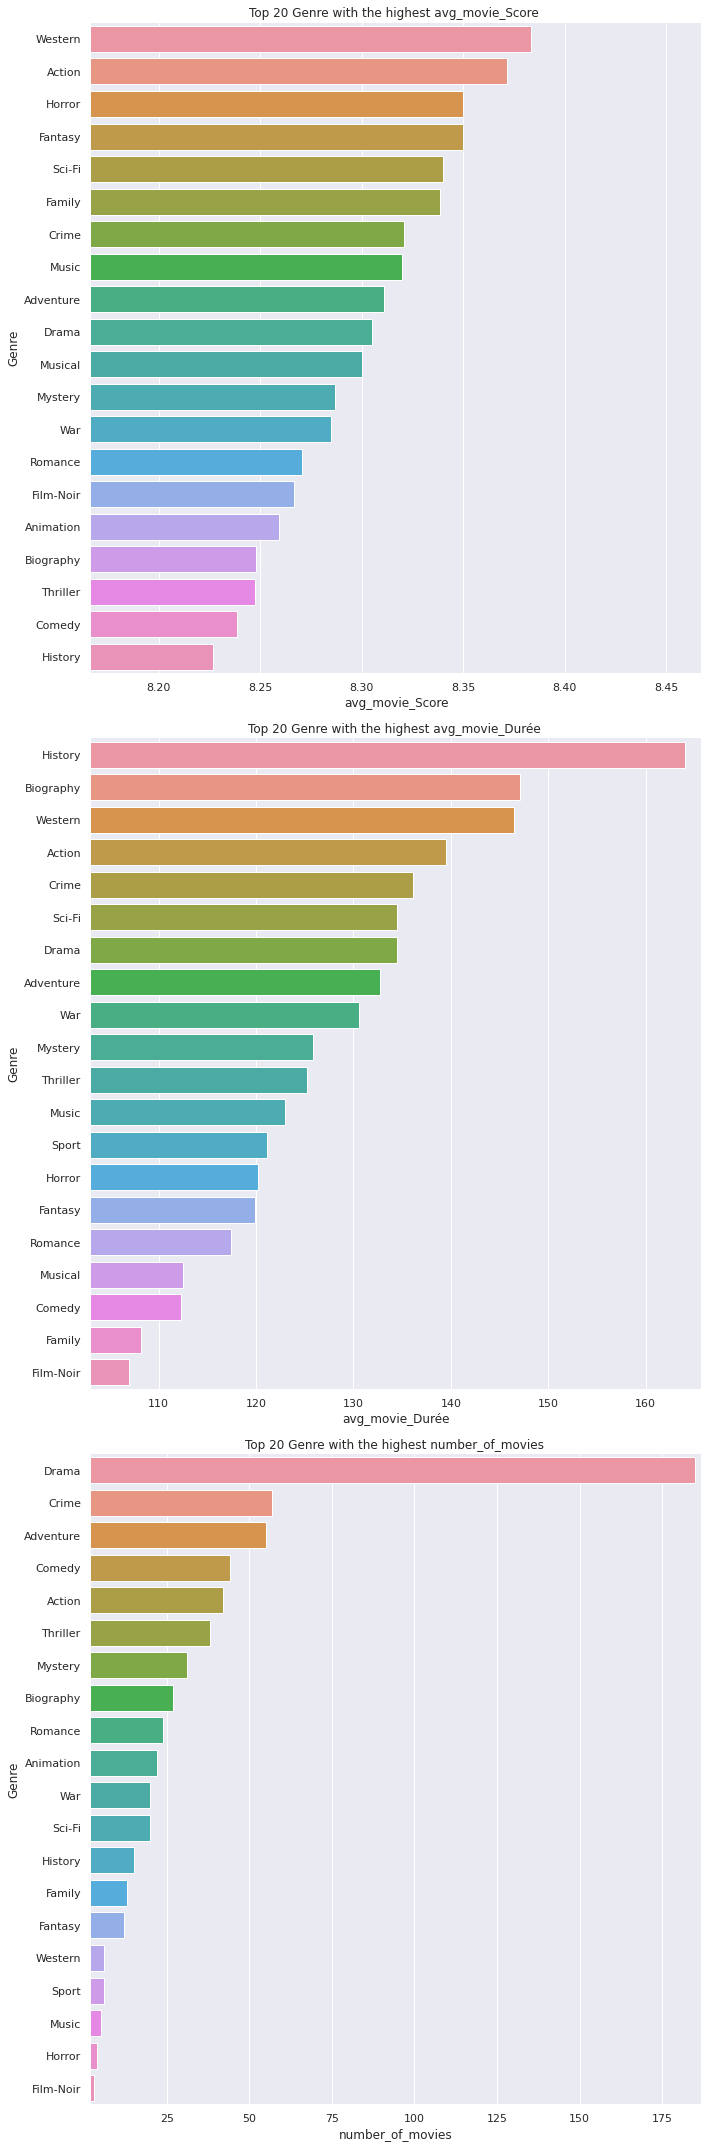

In [48]:
barplot_top_N(Genre, 'Genre', 20)

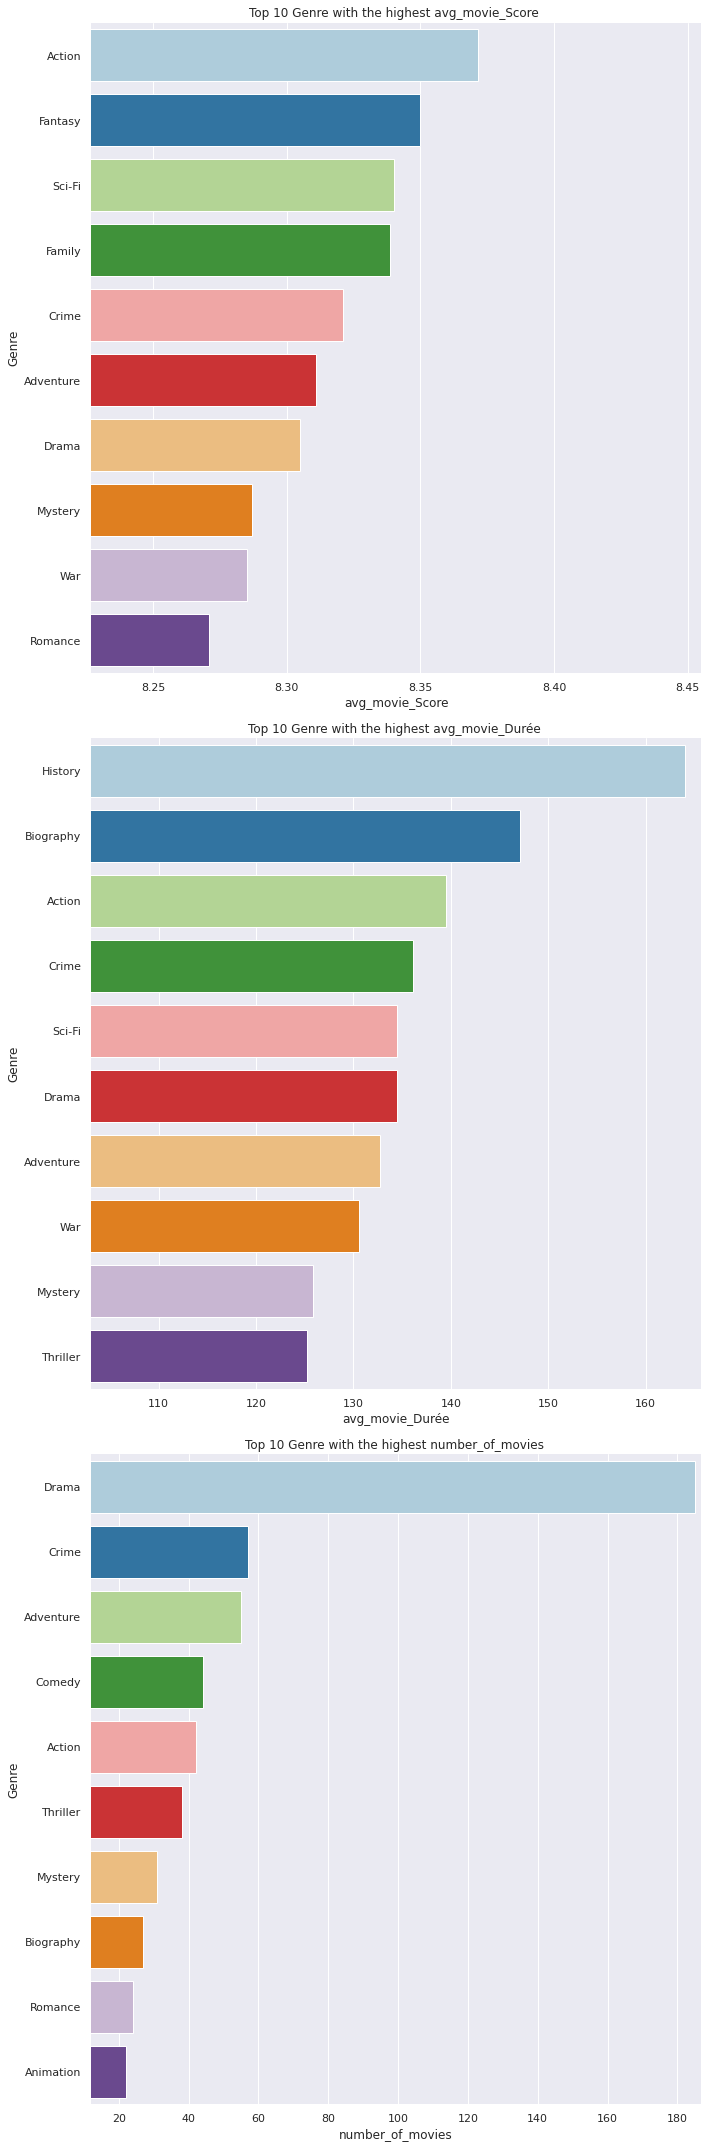

In [49]:
barplot_top_N(Genre[Genre.number_of_movies>10], 'Genre', 10)

In [50]:
Genre.corr()['avg_movie_Score']

avg_movie_Score    1.000000
avg_movie_Durée    0.091737
Name: avg_movie_Score, dtype: float64

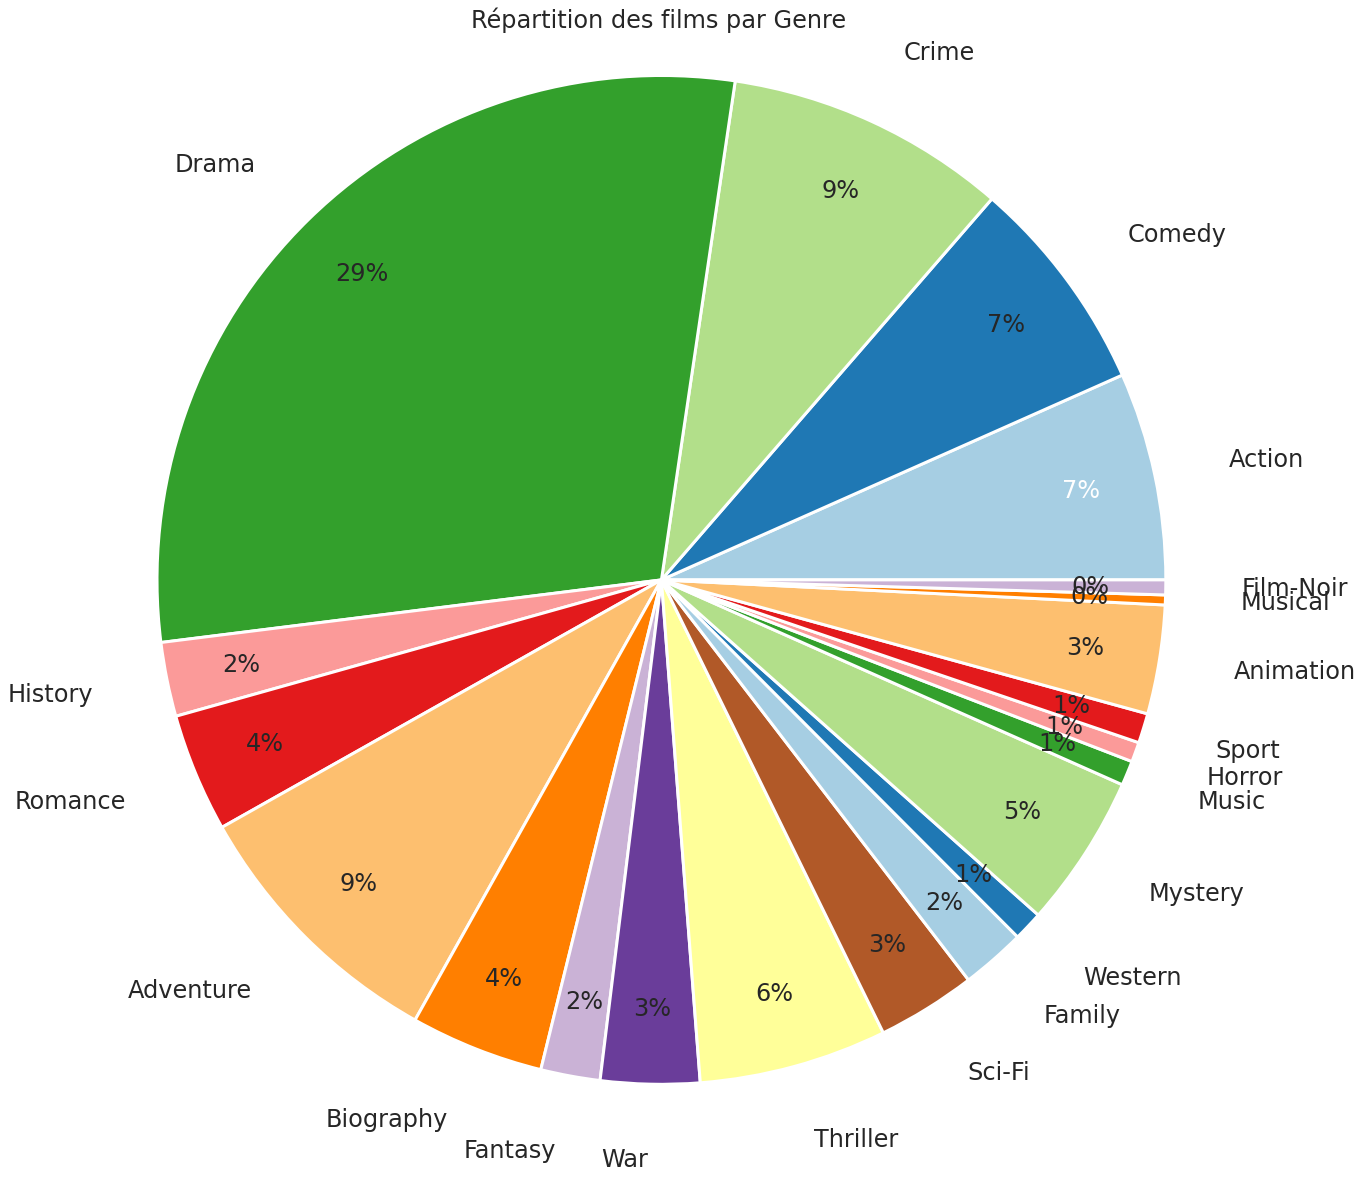

In [51]:
labels = Genre['Genre']
sizes = Genre['number_of_movies']
 
fig1, ax1 = plt.subplots(figsize=(20,20))
patches, texts, autotexts = ax1.pie(sizes, labels=labels, labeldistance=1.15, 
autopct='%.0f%%', pctdistance=0.85,
textprops={'size': 24},
shadow=False, radius=0.5, wedgeprops= {'linewidth' : 3, 'edgecolor' : 'white' })
ax1.axis('equal')
plt.setp(autotexts, size=24)
autotexts[0].set_color('white')
ax1.set_title('Répartition des films par Genre', fontsize=24)
plt.show()
